In [1]:
import torch
import torchvision.models as models

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# Preparing Data

In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Resize(224), #resized for alexnet
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


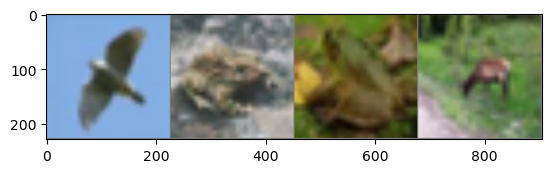

 bird  frog  frog  deer


In [4]:
def imshow(img):
    img = img / 2 + 0.5     # Unnormalize.
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get random training images.
dataiter = iter(trainloader)
#images, labels = dataiter.next()
images, labels = next(dataiter)
# Show images.
imshow(torchvision.utils.make_grid(images))
# Print labels.
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

# Default Normalization

## Default Pooling + ReLU

### Change Learning Rate

In [40]:
alexnet = models.alexnet(pretrained=True)
num_classes = 10
alexnet.classifier[6] = nn.Linear(alexnet.classifier[6].in_features, num_classes)

In [41]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)  
alexnet.to(device)

cuda:0


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [42]:
# Use cross-entropy as loss function.
loss_func = nn.CrossEntropyLoss()  
# Use stochastic gradient descent (SGD) as optimizer.
opt = optim.SGD(alexnet.parameters(), lr=0.01, momentum=0.9) 

In [43]:
avg_losses = []   
epochs = 10       
print_freq = 100

for epoch in range(epochs):  # Loop over the dataset multiple times.
    running_loss = 0.0       # Initialize running loss.
    for i, data in enumerate(trainloader, 0):
        # Get the inputs.
        inputs, labels = data
        
        # Move the inputs to the specified device.
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Zero the parameter gradients.
        opt.zero_grad()

        # Forward step.
        outputs = alexnet(inputs)
        loss = loss_func(outputs, labels)
        
        # Backward step.
        loss.backward()
        
        # Optimization step (update the parameters).
        opt.step()

        # Print statistics.
        running_loss += loss.item()
        if i % print_freq == print_freq - 1: # Print every several mini-batches.
            avg_loss = running_loss / print_freq
            print('[epoch: {}, i: {:5d}] avg mini-batch loss: {:.3f}'.format(
                epoch, i, avg_loss))
            avg_losses.append(avg_loss)
            running_loss = 0.0

print('Finished Training.')

[epoch: 0, i:    99] avg mini-batch loss: nan
[epoch: 0, i:   199] avg mini-batch loss: nan
[epoch: 0, i:   299] avg mini-batch loss: nan
[epoch: 0, i:   399] avg mini-batch loss: nan
[epoch: 0, i:   499] avg mini-batch loss: nan
[epoch: 0, i:   599] avg mini-batch loss: nan
[epoch: 0, i:   699] avg mini-batch loss: nan
[epoch: 0, i:   799] avg mini-batch loss: nan
[epoch: 0, i:   899] avg mini-batch loss: nan
[epoch: 0, i:   999] avg mini-batch loss: nan
[epoch: 0, i:  1099] avg mini-batch loss: nan
[epoch: 0, i:  1199] avg mini-batch loss: nan
[epoch: 0, i:  1299] avg mini-batch loss: nan
[epoch: 0, i:  1399] avg mini-batch loss: nan
[epoch: 0, i:  1499] avg mini-batch loss: nan
[epoch: 0, i:  1599] avg mini-batch loss: nan
[epoch: 0, i:  1699] avg mini-batch loss: nan
[epoch: 0, i:  1799] avg mini-batch loss: nan
[epoch: 0, i:  1899] avg mini-batch loss: nan
[epoch: 0, i:  1999] avg mini-batch loss: nan
[epoch: 0, i:  2099] avg mini-batch loss: nan
[epoch: 0, i:  2199] avg mini-batc

#### Changing the learning rate to 0.01 like for ResNet does not produce valid result as the loss are all nan. AlexNet seem to not support the learning rate of 0.01. Therefore, the learning rate for AlexNet will all be 0.001.

#### Default Pooling + ReLU

In [39]:
alexnet = models.alexnet(pretrained=True)
num_classes = 10
alexnet.classifier[6] = nn.Linear(alexnet.classifier[6].in_features, num_classes)

In [6]:
alexnet.eval()

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [7]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)  
alexnet.to(device)

cuda:0


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [8]:
# Use cross-entropy as loss function.
loss_func = nn.CrossEntropyLoss()  
# Use stochastic gradient descent (SGD) as optimizer.
opt = optim.SGD(alexnet.parameters(), lr=0.001, momentum=0.9) 

In [9]:
avg_losses = []   # Avg. losses.
epochs = 10       # Total epochs.
print_freq = 100  # Print frequency.

for epoch in range(epochs):  # Loop over the dataset multiple times.
    running_loss = 0.0       # Initialize running loss.
    for i, data in enumerate(trainloader, 0):
        # Get the inputs.
        inputs, labels = data
        
        # Move the inputs to the specified device.
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Zero the parameter gradients.
        opt.zero_grad()

        # Forward step.
        outputs = alexnet(inputs)
        loss = loss_func(outputs, labels)
        
        # Backward step.
        loss.backward()
        
        # Optimization step (update the parameters).
        opt.step()

        # Print statistics.
        running_loss += loss.item()
        if i % print_freq == print_freq - 1: # Print every several mini-batches.
            avg_loss = running_loss / print_freq
            print('[epoch: {}, i: {:5d}] avg mini-batch loss: {:.3f}'.format(
                epoch, i, avg_loss))
            avg_losses.append(avg_loss)
            running_loss = 0.0

print('Finished Training.')

[epoch: 0, i:    99] avg mini-batch loss: 2.078
[epoch: 0, i:   199] avg mini-batch loss: 1.744
[epoch: 0, i:   299] avg mini-batch loss: 1.543
[epoch: 0, i:   399] avg mini-batch loss: 1.620
[epoch: 0, i:   499] avg mini-batch loss: 1.422
[epoch: 0, i:   599] avg mini-batch loss: 1.297
[epoch: 0, i:   699] avg mini-batch loss: 1.116
[epoch: 0, i:   799] avg mini-batch loss: 1.175
[epoch: 0, i:   899] avg mini-batch loss: 1.132
[epoch: 0, i:   999] avg mini-batch loss: 1.145
[epoch: 0, i:  1099] avg mini-batch loss: 1.077
[epoch: 0, i:  1199] avg mini-batch loss: 0.960
[epoch: 0, i:  1299] avg mini-batch loss: 1.068
[epoch: 0, i:  1399] avg mini-batch loss: 0.941
[epoch: 0, i:  1499] avg mini-batch loss: 1.018
[epoch: 0, i:  1599] avg mini-batch loss: 0.961
[epoch: 0, i:  1699] avg mini-batch loss: 0.894
[epoch: 0, i:  1799] avg mini-batch loss: 0.939
[epoch: 0, i:  1899] avg mini-batch loss: 0.908
[epoch: 0, i:  1999] avg mini-batch loss: 0.881
[epoch: 0, i:  2099] avg mini-batch loss

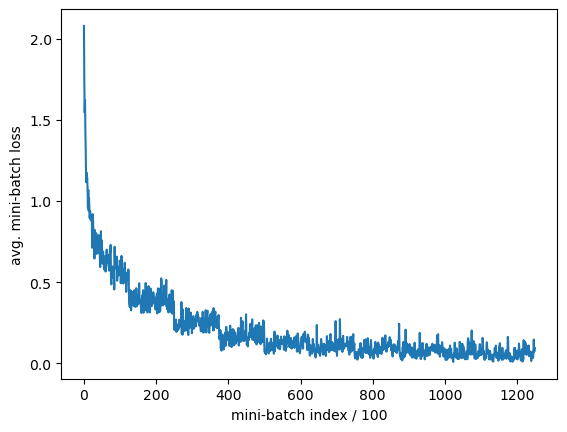

In [10]:
plt.plot(avg_losses)
plt.xlabel('mini-batch index / {}'.format(print_freq))
plt.ylabel('avg. mini-batch loss')
plt.show()

In [11]:
# Get test accuracy.
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = alexnet(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 85 %


In [12]:
# Get test accuracy for each class.
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = alexnet(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 81 %
Accuracy of   car : 93 %
Accuracy of  bird : 78 %
Accuracy of   cat : 66 %
Accuracy of  deer : 89 %
Accuracy of   dog : 86 %
Accuracy of  frog : 87 %
Accuracy of horse : 85 %
Accuracy of  ship : 88 %
Accuracy of truck : 93 %


## Average Pooling + ReLU

In [16]:
alexnet = models.alexnet(pretrained=True)
num_classes = 10
alexnet.classifier[6] = nn.Linear(alexnet.classifier[6].in_features, num_classes)
for i, layer in enumerate(alexnet.features):
    if isinstance(layer, nn.MaxPool2d):
        alexnet.features[i] = nn.AvgPool2d(kernel_size=3, stride=2, padding=1)

In [17]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)  
alexnet.to(device)

cuda:0


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): AvgPool2d(kernel_size=3, stride=2, padding=1)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): AvgPool2d(kernel_size=3, stride=2, padding=1)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): AvgPool2d(kernel_size=3, stride=2, padding=1)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
    (2): ReLU(inplace=True)
    (3): Dropout(p=0.5, inplace=False)
    (4): Linear(in_fe

In [18]:
# Use cross-entropy as loss function.
loss_func = nn.CrossEntropyLoss()  
# Use stochastic gradient descent (SGD) as optimizer.
opt = optim.SGD(alexnet.parameters(), lr=0.001, momentum=0.9) 

In [19]:
avg_losses = []   # Avg. losses.
epochs = 10       # Total epochs.
print_freq = 100  # Print frequency.

for epoch in range(epochs):  # Loop over the dataset multiple times.
    running_loss = 0.0       # Initialize running loss.
    for i, data in enumerate(trainloader, 0):
        # Get the inputs.
        inputs, labels = data
        
        # Move the inputs to the specified device.
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Zero the parameter gradients.
        opt.zero_grad()

        # Forward step.
        outputs = alexnet(inputs)
        loss = loss_func(outputs, labels)
        
        # Backward step.
        loss.backward()
        
        # Optimization step (update the parameters).
        opt.step()

        # Print statistics.
        running_loss += loss.item()
        if i % print_freq == print_freq - 1: # Print every several mini-batches.
            avg_loss = running_loss / print_freq
            print('[epoch: {}, i: {:5d}] avg mini-batch loss: {:.3f}'.format(
                epoch, i, avg_loss))
            avg_losses.append(avg_loss)
            running_loss = 0.0

print('Finished Training.')

[epoch: 0, i:    99] avg mini-batch loss: 2.223
[epoch: 0, i:   199] avg mini-batch loss: 1.990
[epoch: 0, i:   299] avg mini-batch loss: 1.842
[epoch: 0, i:   399] avg mini-batch loss: 1.752
[epoch: 0, i:   499] avg mini-batch loss: 1.708
[epoch: 0, i:   599] avg mini-batch loss: 1.603
[epoch: 0, i:   699] avg mini-batch loss: 1.638
[epoch: 0, i:   799] avg mini-batch loss: 1.558
[epoch: 0, i:   899] avg mini-batch loss: 1.476
[epoch: 0, i:   999] avg mini-batch loss: 1.520
[epoch: 0, i:  1099] avg mini-batch loss: 1.321
[epoch: 0, i:  1199] avg mini-batch loss: 1.412
[epoch: 0, i:  1299] avg mini-batch loss: 1.279
[epoch: 0, i:  1399] avg mini-batch loss: 1.379
[epoch: 0, i:  1499] avg mini-batch loss: 1.241
[epoch: 0, i:  1599] avg mini-batch loss: 1.202
[epoch: 0, i:  1699] avg mini-batch loss: 1.287
[epoch: 0, i:  1799] avg mini-batch loss: 1.255
[epoch: 0, i:  1899] avg mini-batch loss: 1.173
[epoch: 0, i:  1999] avg mini-batch loss: 1.202
[epoch: 0, i:  2099] avg mini-batch loss

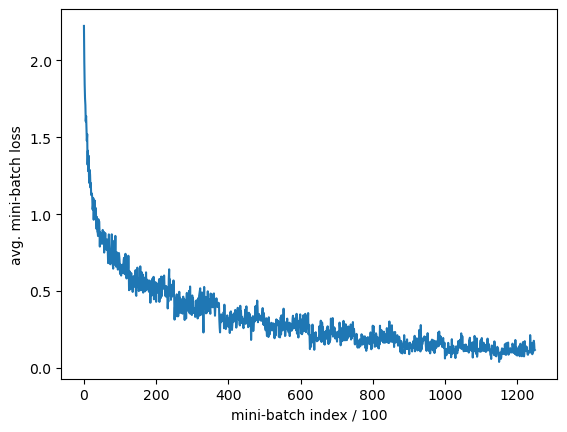

In [20]:
plt.plot(avg_losses)
plt.xlabel('mini-batch index / {}'.format(print_freq))
plt.ylabel('avg. mini-batch loss')
plt.show()

In [21]:
# Get test accuracy.
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = alexnet(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 86 %


In [22]:
# Get test accuracy for each class.
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = alexnet(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 88 %
Accuracy of   car : 90 %
Accuracy of  bird : 79 %
Accuracy of   cat : 77 %
Accuracy of  deer : 90 %
Accuracy of   dog : 80 %
Accuracy of  frog : 90 %
Accuracy of horse : 89 %
Accuracy of  ship : 92 %
Accuracy of truck : 90 %


## Default Pooling + Sigmoid

In [24]:
alexnet = models.alexnet(pretrained=True)
num_classes = 10
alexnet.classifier[6] = nn.Linear(alexnet.classifier[6].in_features, num_classes)

def replace_relu_with_sigmoid(model):
    for name, module in model.named_children():
        # Replace ReLu with Sigmoid
        if isinstance(module, nn.ReLU):
            setattr(model, name, nn.Sigmoid())
        
        # Module is Sequential block or has children, replace it recursively
        elif isinstance(module, nn.Sequential):
            for i, sub_module in enumerate(module):
                if isinstance(sub_module, nn.ReLU):
                    module[i] = nn.Sigmoid()
                else:
                    replace_relu_with_sigmoid(sub_module)  # Recursively for children
        else:
            replace_relu_with_sigmoid(module)

replace_relu_with_sigmoid(alexnet)

In [25]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)  
alexnet.to(device)

cuda:0


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): Sigmoid()
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): Sigmoid()
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): Sigmoid()
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): Sigmoid()
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): Sigmoid()
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
    (2): Sigmoid()
    (3): Dropout(p=0.5, inp

In [26]:
# Use cross-entropy as loss function.
loss_func = nn.CrossEntropyLoss()  
# Use stochastic gradient descent (SGD) as optimizer.
opt = optim.SGD(alexnet.parameters(), lr=0.001, momentum=0.9) 

In [27]:
avg_losses = []   # Avg. losses.
epochs = 10       # Total epochs.
print_freq = 100  # Print frequency.

for epoch in range(epochs):  # Loop over the dataset multiple times.
    running_loss = 0.0       # Initialize running loss.
    for i, data in enumerate(trainloader, 0):
        # Get the inputs.
        inputs, labels = data
        
        # Move the inputs to the specified device.
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Zero the parameter gradients.
        opt.zero_grad()

        # Forward step.
        outputs = alexnet(inputs)
        loss = loss_func(outputs, labels)
        
        # Backward step.
        loss.backward()
        
        # Optimization step (update the parameters).
        opt.step()

        # Print statistics.
        running_loss += loss.item()
        if i % print_freq == print_freq - 1: # Print every several mini-batches.
            avg_loss = running_loss / print_freq
            print('[epoch: {}, i: {:5d}] avg mini-batch loss: {:.3f}'.format(
                epoch, i, avg_loss))
            avg_losses.append(avg_loss)
            running_loss = 0.0

print('Finished Training.')

[epoch: 0, i:    99] avg mini-batch loss: 2.522
[epoch: 0, i:   199] avg mini-batch loss: 2.363
[epoch: 0, i:   299] avg mini-batch loss: 2.372
[epoch: 0, i:   399] avg mini-batch loss: 2.356
[epoch: 0, i:   499] avg mini-batch loss: 2.338
[epoch: 0, i:   599] avg mini-batch loss: 2.342
[epoch: 0, i:   699] avg mini-batch loss: 2.345
[epoch: 0, i:   799] avg mini-batch loss: 2.331
[epoch: 0, i:   899] avg mini-batch loss: 2.331
[epoch: 0, i:   999] avg mini-batch loss: 2.324
[epoch: 0, i:  1099] avg mini-batch loss: 2.329
[epoch: 0, i:  1199] avg mini-batch loss: 2.325
[epoch: 0, i:  1299] avg mini-batch loss: 2.323
[epoch: 0, i:  1399] avg mini-batch loss: 2.304
[epoch: 0, i:  1499] avg mini-batch loss: 2.331
[epoch: 0, i:  1599] avg mini-batch loss: 2.321
[epoch: 0, i:  1699] avg mini-batch loss: 2.324
[epoch: 0, i:  1799] avg mini-batch loss: 2.308
[epoch: 0, i:  1899] avg mini-batch loss: 2.312
[epoch: 0, i:  1999] avg mini-batch loss: 2.326
[epoch: 0, i:  2099] avg mini-batch loss

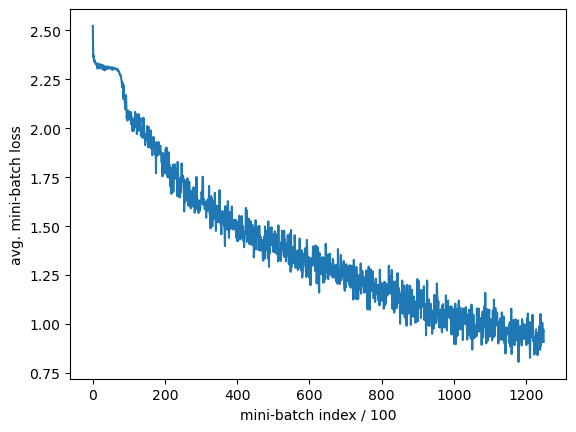

In [28]:
plt.plot(avg_losses)
plt.xlabel('mini-batch index / {}'.format(print_freq))
plt.ylabel('avg. mini-batch loss')
plt.show()

In [29]:
# Get test accuracy.
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = alexnet(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 66 %


In [30]:
# Get test accuracy for each class.
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = alexnet(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 61 %
Accuracy of   car : 73 %
Accuracy of  bird : 45 %
Accuracy of   cat : 37 %
Accuracy of  deer : 73 %
Accuracy of   dog : 67 %
Accuracy of  frog : 68 %
Accuracy of horse : 72 %
Accuracy of  ship : 81 %
Accuracy of truck : 87 %


## Average Pooling + Sigmoid

In [32]:
alexnet = models.alexnet(pretrained=True)
num_classes = 10
alexnet.classifier[6] = nn.Linear(alexnet.classifier[6].in_features, num_classes)
#switch to average pooling
for i, layer in enumerate(alexnet.features):
    if isinstance(layer, nn.MaxPool2d):
        alexnet.features[i] = nn.AvgPool2d(kernel_size=3, stride=2, padding=1)

#replace with sigmoid activation function
def replace_relu_with_sigmoid(model):
    for name, module in model.named_children():
        # Replace ReLu with Sigmoid
        if isinstance(module, nn.ReLU):
            setattr(model, name, nn.Sigmoid())
        
        # Module is Sequential block or has children, replace it recursively
        elif isinstance(module, nn.Sequential):
            for i, sub_module in enumerate(module):
                if isinstance(sub_module, nn.ReLU):
                    module[i] = nn.Sigmoid()
                else:
                    replace_relu_with_sigmoid(sub_module)  # Recursively for children
        else:
            replace_relu_with_sigmoid(module)

replace_relu_with_sigmoid(alexnet)


In [33]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)  
alexnet.to(device)

cuda:0


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): Sigmoid()
    (2): AvgPool2d(kernel_size=3, stride=2, padding=1)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): Sigmoid()
    (5): AvgPool2d(kernel_size=3, stride=2, padding=1)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): Sigmoid()
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): Sigmoid()
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): Sigmoid()
    (12): AvgPool2d(kernel_size=3, stride=2, padding=1)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
    (2): Sigmoid()
    (3): Dropout(p=0.5, inplace=False)
    (4): Linear(in_features=4096, out_features=4096, bias=True)
    (5): Si

In [34]:
# Use cross-entropy as loss function.
loss_func = nn.CrossEntropyLoss()  
# Use stochastic gradient descent (SGD) as optimizer.
opt = optim.SGD(alexnet.parameters(), lr=0.001, momentum=0.9) 

In [35]:
avg_losses = []   # Avg. losses.
epochs = 10       # Total epochs.
print_freq = 100  # Print frequency.

for epoch in range(epochs):  # Loop over the dataset multiple times.
    running_loss = 0.0       # Initialize running loss.
    for i, data in enumerate(trainloader, 0):
        # Get the inputs.
        inputs, labels = data
        
        # Move the inputs to the specified device.
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Zero the parameter gradients.
        opt.zero_grad()

        # Forward step.
        outputs = alexnet(inputs)
        loss = loss_func(outputs, labels)
        
        # Backward step.
        loss.backward()
        
        # Optimization step (update the parameters).
        opt.step()

        # Print statistics.
        running_loss += loss.item()
        if i % print_freq == print_freq - 1: # Print every several mini-batches.
            avg_loss = running_loss / print_freq
            print('[epoch: {}, i: {:5d}] avg mini-batch loss: {:.3f}'.format(
                epoch, i, avg_loss))
            avg_losses.append(avg_loss)
            running_loss = 0.0

print('Finished Training.')

[epoch: 0, i:    99] avg mini-batch loss: 2.479
[epoch: 0, i:   199] avg mini-batch loss: 2.384
[epoch: 0, i:   299] avg mini-batch loss: 2.371
[epoch: 0, i:   399] avg mini-batch loss: 2.339
[epoch: 0, i:   499] avg mini-batch loss: 2.345
[epoch: 0, i:   599] avg mini-batch loss: 2.351
[epoch: 0, i:   699] avg mini-batch loss: 2.330
[epoch: 0, i:   799] avg mini-batch loss: 2.326
[epoch: 0, i:   899] avg mini-batch loss: 2.338
[epoch: 0, i:   999] avg mini-batch loss: 2.319
[epoch: 0, i:  1099] avg mini-batch loss: 2.323
[epoch: 0, i:  1199] avg mini-batch loss: 2.323
[epoch: 0, i:  1299] avg mini-batch loss: 2.306
[epoch: 0, i:  1399] avg mini-batch loss: 2.327
[epoch: 0, i:  1499] avg mini-batch loss: 2.318
[epoch: 0, i:  1599] avg mini-batch loss: 2.327
[epoch: 0, i:  1699] avg mini-batch loss: 2.316
[epoch: 0, i:  1799] avg mini-batch loss: 2.301
[epoch: 0, i:  1899] avg mini-batch loss: 2.320
[epoch: 0, i:  1999] avg mini-batch loss: 2.322
[epoch: 0, i:  2099] avg mini-batch loss

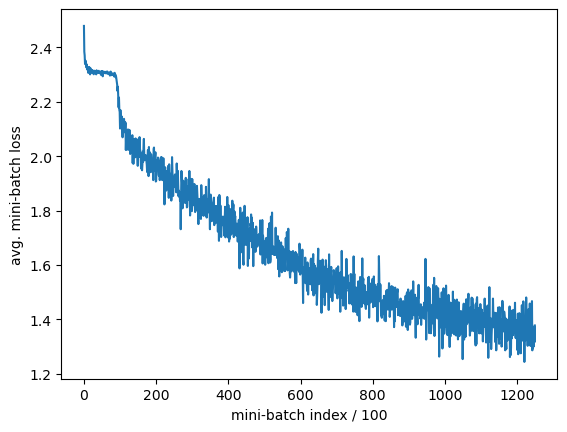

In [36]:
plt.plot(avg_losses)
plt.xlabel('mini-batch index / {}'.format(print_freq))
plt.ylabel('avg. mini-batch loss')
plt.show()

In [37]:
# Get test accuracy.
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = alexnet(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 47 %


In [38]:
# Get test accuracy for each class.
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = alexnet(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 47 %
Accuracy of   car : 44 %
Accuracy of  bird : 25 %
Accuracy of   cat : 59 %
Accuracy of  deer : 19 %
Accuracy of   dog : 47 %
Accuracy of  frog : 41 %
Accuracy of horse : 49 %
Accuracy of  ship : 70 %
Accuracy of truck : 70 %
